# Connecting the Proper dataframe to perform the necessary Analysis
#We are going to connect to the dataframe and only pull out revenue and budget as we only want to see the trend between revenue and budget.

#We will clean the metadata to only reflect what columns we want to repersent the new dataframe.

In [4]:
#Importing Dependencies
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import psycopg2
import warnings
import seaborn as sns

In [5]:
#establishing the connection
conn = psycopg2.connect(
   database="movies_db", user='postgres', password='finalproject', host='moviesdb.ct0o6q0pbonx.us-east-2.rds.amazonaws.com', port= '5432'
)

In [6]:
#Setting auto commit false
conn.autocommit = True


In [7]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()


In [8]:
cursor.execute('''select m.id, m.title , m.release_date, m.revenue, m.budget, m.company,
g.drama, g.comedy, g.thriller, g.romance, g.action, g.horror, g.crime, g.documentary, g.adventure, g.science_fiction, g.family,  g.mystery, g.fantasy, g.animation, g.foreign,g.music, g.history, g.war, g.western,g.tv_movie, g.others
from movies_metadata m left join
genres g on g."movieId"= m.id
where m.status = 'Released' ''')

In [9]:
#Fetching 1st row from the table
result = cursor.fetchone();
print(result)


('862', 'Toy Story', datetime.date(1995, 10, 30), Decimal('373554033.0'), 30000000, 'Pixar Animation Studios', False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False)


In [10]:
#Fetching all rows from the table
result = cursor.fetchall()
print(result)


[('8844', 'Jumanji', datetime.date(1995, 12, 15), Decimal('262797249.0'), 65000000, 'TriStar Pictures', False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False), ('31357', 'Waiting to Exhale', datetime.date(1995, 12, 22), Decimal('81452156.0'), 16000000, 'Twentieth Century Fox Film Corporation', True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), ('11862', 'Father of the Bride Part II', datetime.date(1995, 2, 10), Decimal('76578911.0'), 0, 'Sandollar Productions', False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), ('949', 'Heat', datetime.date(1995, 12, 15), Decimal('187436818.0'), 60000000, 'Regency Enterprises', True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, F

# Creating the Dataframe

#We are creating the dataframe that will be use to to test in our machine learning with the variables release date and revenue.

In [11]:
data = pd.DataFrame(result,columns=["id","Title","Release Date","Revenue","Budget","company","drama", "comedy", "thriller", "romance", "action", "horror", "crime", "documentary", "adventure", "science_fiction","family", "mystery", "fantasy", "animation", "foreign","music", "history", "war", "western","tv_movie", "others"])


In [12]:
data

,id,Title,Release Date,Revenue,Budget,company,drama,comedy,thriller,romance,...,mystery,fantasy,animation,foreign,music,history,war,western,tv_movie,others
0,8844,Jumanji,1995-12-15,262797249.0,65000000,TriStar Pictures,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,31357,Waiting to Exhale,1995-12-22,81452156.0,16000000,Twentieth Century Fox Film Corporation,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,11862,Father of the Bride Part II,1995-02-10,76578911.0,0,Sandollar Productions,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,949,Heat,1995-12-15,187436818.0,60000000,Regency Enterprises,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,9091,Sudden Death,1995-12-22,64350171.0,35000000,Universal Pictures,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,280422,All at Once,2014-06-05,3.0,750000,Кинокомпания «Lunapark»,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7380,240789,The Miracle,2009-10-09,50656.0,0,Central Partnership,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
7381,62757,Savages,2006-11-23,1328612.0,800000,None,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7382,63281,Pro Lyuboff,2010-09-30,1268793.0,2000000,Profit,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
len(data)

7384

# Cleaned the data to allow no interruptions
#We want to cancel out any possible na values or skewnesss

In [14]:
# Making the Revenue colum into a interger
data["Revenue"] = data["Revenue"].astype('int64')


In [15]:
#Making the Release date column format year,date,month
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [16]:
##Dropping al na values
data = data.dropna(subset=['Revenue'])
##Dropping al na values
data = data.dropna(subset=['others'])

In [17]:
#Adding month to columns and the corralate to the release date
data["Month"] = pd.DatetimeIndex(data['Release Date']).month

In [18]:
# Looping Month and if its greater than 11 then it be read 1
data.loc[data['Month'] >= 11 , 'Holiday'] = 1 
#Looping the month column and if its less than 11 then it be read 0
data.loc[data['Month'] < 11, 'Holiday'] = 0 

In [19]:
#Changing the interger to read 1 or 0 instead of false or true
data["comedy"] = data["comedy"].astype(int)
data["drama"] = data["drama"].astype(int)
data["thriller"] = data["thriller"].astype(int)
data["romance"] = data["romance"].astype(int)
data["action"] = data["action"].astype(int)
data["horror"] = data["horror"].astype(int)
data["crime"] = data["crime"].astype(int)
data["documentary"] = data["documentary"].astype(int)
data["adventure"] = data["adventure"].astype(int)
data["science_fiction"] = data["science_fiction"].astype(int)
data["family"]= data["family"].astype(int)
data["mystery"] = data["mystery"].astype(int)
data["fantasy"] = data["fantasy"].astype(int)
data["animation"]  = data["animation"].astype(int)
data["foreign"] = data["foreign"].astype(int)
data["music"] = data["music"].astype(int)
data["history"] = data["history"].astype(int)
data["war"] = data["war"].astype(int)
data["western"] =data["western"].astype(int)
data["tv_movie"] =data["tv_movie"].astype(int)
data["others"] = data["others"].astype(int)
    


In [20]:
data.head()

,id,Title,Release Date,Revenue,Budget,company,drama,comedy,thriller,romance,...,animation,foreign,music,history,war,western,tv_movie,others,Month,Holiday
0,8844,Jumanji,1995-12-15,262797249,65000000,TriStar Pictures,0,0,0,0,...,0,0,0,0,0,0,0,0,12,1.0
1,31357,Waiting to Exhale,1995-12-22,81452156,16000000,Twentieth Century Fox Film Corporation,1,1,0,1,...,0,0,0,0,0,0,0,0,12,1.0
2,11862,Father of the Bride Part II,1995-02-10,76578911,0,Sandollar Productions,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0.0
3,949,Heat,1995-12-15,187436818,60000000,Regency Enterprises,1,0,1,0,...,0,0,0,0,0,0,0,0,12,1.0
4,9091,Sudden Death,1995-12-22,64350171,35000000,Universal Pictures,0,0,1,0,...,0,0,0,0,0,0,0,0,12,1.0


In [21]:
len(data)

7384

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7384 entries, 0 to 7383
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               7384 non-null   object        
 1   Title            7384 non-null   object        
 2   Release Date     7384 non-null   datetime64[ns]
 3   Revenue          7384 non-null   int64         
 4   Budget           7384 non-null   int64         
 5   company          6980 non-null   object        
 6   drama            7384 non-null   int32         
 7   comedy           7384 non-null   int32         
 8   thriller         7384 non-null   int32         
 9   romance          7384 non-null   int32         
 10  action           7384 non-null   int32         
 11  horror           7384 non-null   int32         
 12  crime            7384 non-null   int32         
 13  documentary      7384 non-null   int32         
 14  adventure        7384 non-null   int32  

In [23]:
#Closing the connection
conn.close()

# Showing the top 15 Movies based of Revenue

In [24]:
Top15 = data.sort_values(by='Revenue', ascending=False)
print(Top15)

          id                         Title Release Date     Revenue  \
4622   19995                        Avatar   2009-12-10  2787965087   
6230  140607  Star Wars: The Force Awakens   2015-12-15  2068223624   
754      597                       Titanic   1997-11-18  1845034188   
5122   24428                  The Avengers   2012-04-25  1519557910   
6143  135397                Jurassic World   2015-06-09  1513528810   
...      ...                           ...          ...         ...   
720    45019             Washington Square   1997-10-10           1   
6896  114394               The Lonely Lady   1983-10-02           1   
4954   53230               The Merry Widow   1925-08-26           1   
56     51352         Anne Frank Remembered   1995-06-08           1   
2975   47168       The Wind in the Willows   1996-10-16           1   

         Budget                    company  drama  comedy  thriller  romance  \
4622  237000000    Ingenious Film Partners      0       0         0

In [25]:
Top15.head(15)

,id,Title,Release Date,Revenue,Budget,company,drama,comedy,thriller,romance,...,animation,foreign,music,history,war,western,tv_movie,others,Month,Holiday
4622,19995,Avatar,2009-12-10,2787965087,237000000,Ingenious Film Partners,0,0,0,0,...,0,0,0,0,0,0,0,0,12,1.0
6230,140607,Star Wars: The Force Awakens,2015-12-15,2068223624,245000000,Lucasfilm,0,0,0,0,...,0,0,0,0,0,0,0,0,12,1.0
754,597,Titanic,1997-11-18,1845034188,200000000,Paramount Pictures,1,0,1,1,...,0,0,0,0,0,0,0,0,11,1.0
5122,24428,The Avengers,2012-04-25,1519557910,220000000,Paramount Pictures,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0.0
6143,135397,Jurassic World,2015-06-09,1513528810,150000000,Universal Studios,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0.0
6351,168259,Furious 7,2015-04-01,1506249360,190000000,Universal Pictures,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0.0
6233,99861,Avengers: Age of Ultron,2015-04-22,1405403694,280000000,Marvel Studios,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0.0
5060,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1342000000,125000000,Warner Bros.,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0.0
5790,109445,Frozen,2013-11-27,1274219009,150000000,Walt Disney Pictures,0,0,0,0,...,1,0,0,0,0,0,0,0,11,1.0
7199,321612,Beauty and the Beast,2017-03-16,1262886337,160000000,Walt Disney Pictures,0,0,0,1,...,0,0,0,0,0,0,0,0,3,0.0


In [26]:
data.shape

(7384, 29)

# Charting the relationship by using scatter plots

In [27]:
#Defining the variables X and y
X = pd.DataFrame(data, columns=['Budget'])
y = pd.DataFrame(data, columns=['Revenue'])

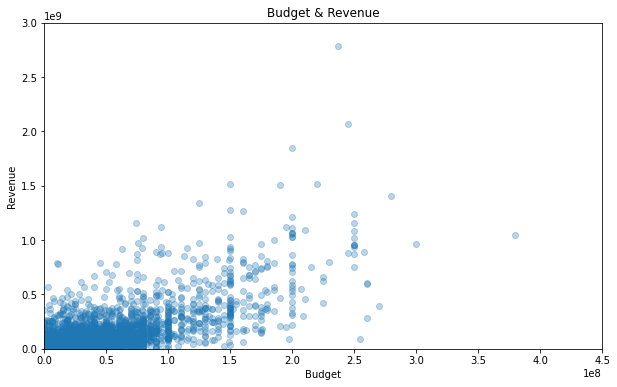

In [28]:
# Graphing the scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

# Adding the linear regression line to the scatter plot

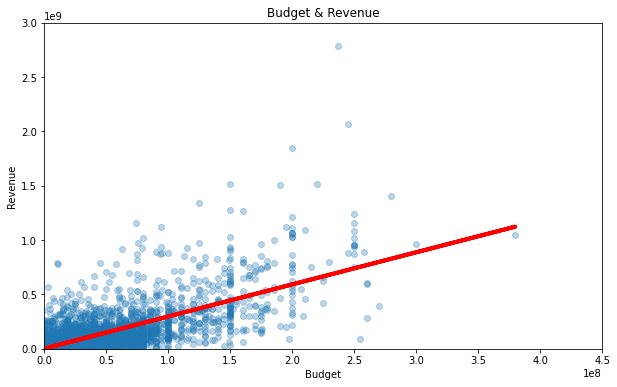

In [29]:
#Calling for the regression and the variables envoled
regression = LinearRegression()
regression.fit(X,y)

#plotting the Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression.predict(X), color="red", linewidth=4)
plt.title("Budget & Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

# Detriming the regression Score 

In [30]:
#Finding the regression score
regression.score(X,y)

0.5544219535974608

# Charting the relationship by using scatter plots

In [ ]:
sns.pairplot(data)

# Adding the linear regression line to the scatter plot

In [31]:
data.corr()

,Revenue,Budget,drama,comedy,thriller,romance,action,horror,crime,documentary,...,animation,foreign,music,history,war,western,tv_movie,others,Month,Holiday
Revenue,1.000000,0.744595,-0.170153,-0.024908,0.002352,-0.059111,0.178270,-0.061185,-0.029442,-0.074115,...,0.170913,-0.047587,-0.024912,-0.025626,-0.004345,-0.021769,-0.002138,NaN,0.037708,0.083303
Budget,0.744595,1.000000,-0.184996,-0.050930,0.053648,-0.099834,0.268191,-0.086181,-0.004407,-0.101313,...,0.165073,-0.061127,-0.043544,0.007171,0.019951,-0.000464,-0.005553,NaN,0.037538,0.076994
drama,-0.170153,-0.184996,1.000000,-0.235045,-0.043590,0.181604,-0.189013,-0.205473,0.063563,-0.150885,...,-0.161538,0.019963,0.023748,0.154152,0.099129,-0.017612,0.011714,NaN,0.083017,0.051178
comedy,-0.024908,-0.050930,-0.235045,1.000000,-0.323275,0.165612,-0.137999,-0.146774,-0.089454,-0.105211,...,0.029633,0.004712,0.013536,-0.130211,-0.097935,-0.050464,-0.008585,NaN,-0.043002,-0.014580
thriller,0.002352,0.053648,-0.043590,-0.323275,1.000000,-0.195528,0.257668,0.237603,0.311236,-0.097745,...,-0.122757,-0.035398,-0.104288,-0.053385,-0.037397,-0.046336,-0.006768,NaN,-0.016486,-0.040997
romance,-0.059111,-0.099834,0.181604,0.165612,-0.195528,1.000000,-0.191992,-0.137989,-0.127940,-0.083566,...,-0.087952,0.032132,0.101223,-0.033659,-0.006063,-0.029358,-0.005711,NaN,0.014759,0.024156
action,0.178270,0.268191,-0.189013,-0.137999,0.257668,-0.191992,1.000000,-0.071165,0.179252,-0.089113,...,-0.045234,-0.013641,-0.081677,0.020689,0.051751,0.044786,-0.006450,NaN,-0.041290,-0.020700
horror,-0.061185,-0.086181,-0.205473,-0.146774,0.237603,-0.137989,-0.071165,1.000000,-0.073908,-0.052645,...,-0.073349,-0.013996,-0.047437,-0.065514,-0.053725,-0.038565,-0.003869,NaN,-0.024801,-0.048400
crime,-0.029442,-0.004407,0.063563,-0.089454,0.311236,-0.127940,0.179252,-0.073908,1.000000,-0.061002,...,-0.089636,-0.026048,-0.059795,-0.055253,-0.070040,-0.012753,-0.004825,NaN,-0.020013,-0.020654
documentary,-0.074115,-0.101313,-0.150885,-0.105211,-0.097745,-0.083566,-0.089113,-0.052645,-0.061002,1.000000,...,-0.040626,0.072473,0.081931,0.009358,-0.018720,-0.015724,-0.002030,NaN,-0.030904,-0.052441


# Splitting the data into X and y and putting the data into a training model


In [32]:
features = ["Month","Holiday","Budget","Release Date","Title"]

In [33]:
X = data[features]
y = data['Revenue']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [35]:
X_train.shape ,y_train.shape

((5168, 5), (5168,))

In [36]:
y_test.shape ,y_test.shape

((2216,), (2216,))

In [37]:
model = LinearRegression()

In [38]:
model.fit(X, y)

TypeError: invalid type promotion

In [39]:
predictions = model.predict(x_test)

NameError: name 'x_test' is not defined